In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# from sklearn.preprocessing import StandardScaler

In [104]:

df=pd.read_csv('/content/social_ads.csv')

In [105]:
df1=df.copy()


In [106]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [108]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [109]:
df.shape

(400, 3)

In [110]:
df.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


Text(0.5, 1.0, 'Distribution of Age')

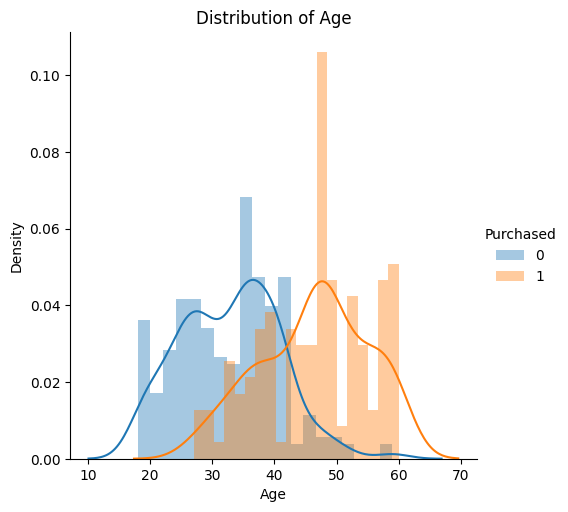

In [111]:
sns.FacetGrid(df, hue='Purchased', height=5) \
    .map(sns.distplot, 'Age', bins=20, kde=True) \
    .add_legend()
plt.title("Distribution of Age")

Text(0.5, 1.0, 'Distribution of Estimated Salary')

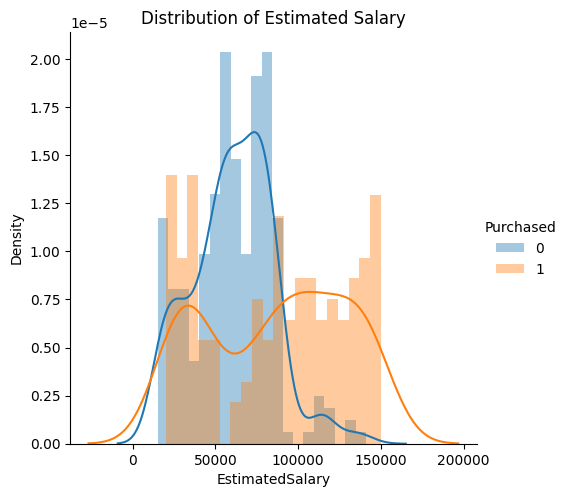

In [112]:
sns.FacetGrid(df, hue='Purchased', height=5) \
    .map(sns.distplot, 'EstimatedSalary', bins=20, kde=True) \
    .add_legend()
plt.title("Distribution of Estimated Salary")

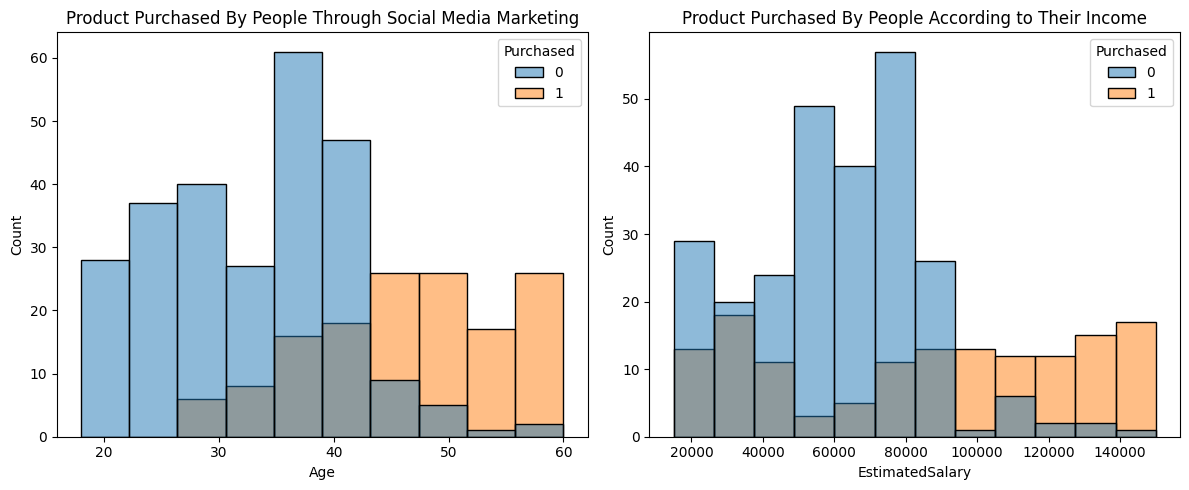

In [113]:
plt.rcParams['figure.figsize'] = (12, 5)  # Adjust figure size as needed

plt.subplot(1,2,1)
sns.histplot(x="Age", hue="Purchased", data=df)
plt.title("Product Purchased By People Through Social Media Marketing")

plt.subplot(1,2,2)
plt.title("Product Purchased By People According to Their Income")
sns.histplot(x="EstimatedSalary", hue="Purchased", data=df)
plt.tight_layout()
plt.show();

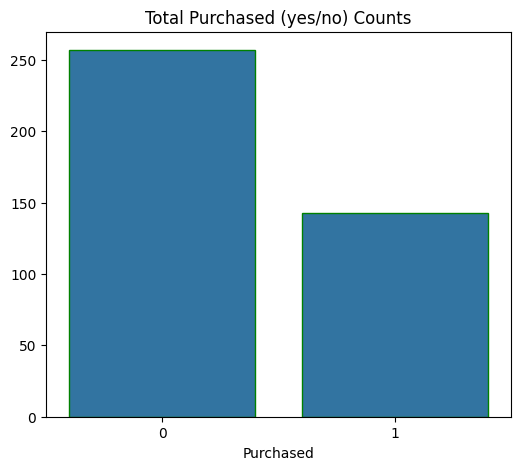

In [114]:
plt.figure(figsize=(6,5))
purchase_count=df['Purchased'].value_counts().sort_index()
sns.barplot(x=purchase_count.index,y=purchase_count.values,edgecolor='green')
plt.title("Total Purchased (yes/no) Counts");

<Figure size 800x600 with 0 Axes>

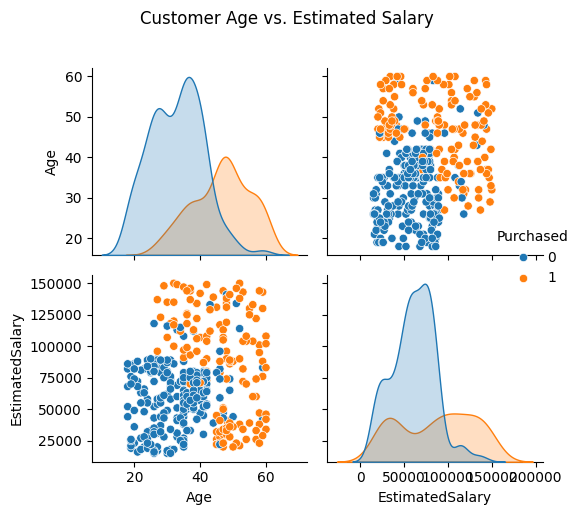

In [115]:
plt.figure(figsize=(8,6))
pairplot = sns.pairplot(df, hue='Purchased')

# Get the figure and the axes of the pair plot
fig = pairplot.fig
fig.suptitle("Customer Age vs. Estimated Salary", y=1.02, ha='center')
plt.tight_layout()  # Adjust the bottom parameter if needed
# Show the plot
plt.show();

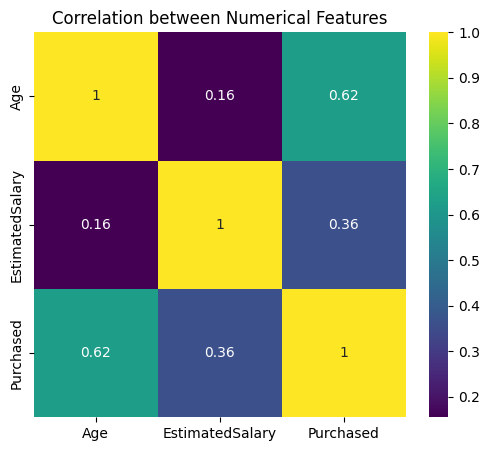

In [116]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Correlation between Numerical Features");

In [117]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.1,random_state=2)

In [119]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((360, 2), (40, 2), (360,), (40,))

In [120]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [121]:
y_pred_log = log.predict(X_test)

In [122]:
cm = confusion_matrix(y_pred_log,y_test)
cm

array([[24,  4],
       [ 2, 10]])

In [123]:
cr = classification_report(y_pred_log,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.71      0.83      0.77        12

    accuracy                           0.85        40
   macro avg       0.82      0.85      0.83        40
weighted avg       0.86      0.85      0.85        40



In [124]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [125]:
y_pred_dtc = dtc.predict(X_test)

In [145]:
cm = confusion_matrix(y_test,y_pred_dtc)
cm

array([[24,  2],
       [ 2, 12]])

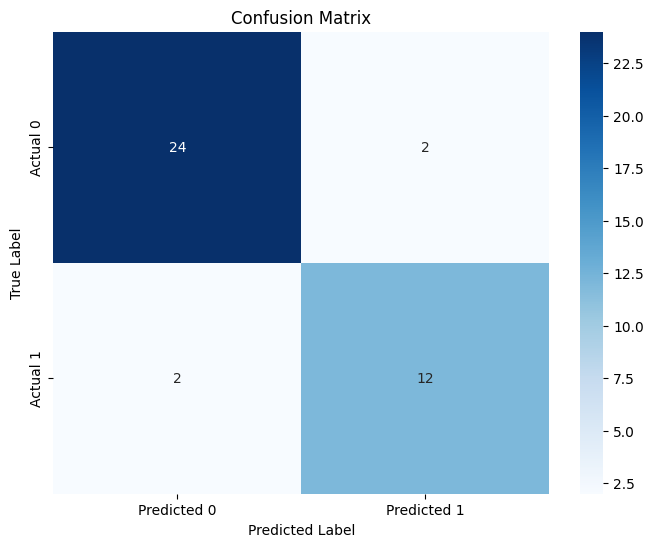

In [147]:
import seaborn as sns

# Assuming you have y_test and y_pred_dtc defined
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [127]:
cr = classification_report(y_pred_dtc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.86      0.86      0.86        14

    accuracy                           0.90        40
   macro avg       0.89      0.89      0.89        40
weighted avg       0.90      0.90      0.90        40



In [128]:
def get_user_input():
  """Gets user input for prediction."""

  age = float(input("Enter Age: "))
  estimated_salary = float(input("Enter Estimated Salary: "))


  # Create a DataFrame with the user input
  user_input = pd.DataFrame({'Age': [age], 'EstimatedSalary': [estimated_salary]})

  return user_input

In [129]:
# Get user input
user_input = get_user_input()

# Make prediction using the trained model
prediction = log.predict(user_input)[0]

# Print the prediction
if prediction == 1:
  print("The user is likely to purchase the product.")
else:
  print("The user is unlikely to purchase the product.")

Enter Age: 20
Enter Estimated Salary: 20000
The user is unlikely to purchase the product.


In [130]:
import pickle

# Save the model to a file
filename = 'log_model.pkl'
pickle.dump(log, open(filename, 'wb'))

In [131]:
!pip install streamlit

In [102]:
# import pickle

# # Load the saved model
# filename = 'log_model.pkl'
# log = pickle.load(open(filename, 'rb'))

# # Define the prediction function
# def predict_purchase(age, estimated_salary):
#   user_input = pd.DataFrame({'Age': [age], 'EstimatedSalary': [estimated_salary]})
#   prediction = log.predict(user_input)[0]
#   return "Yes" if prediction == 1 else "No"  # Convert prediction to "Yes" or "No"


In [138]:
%%writefile G_run.py
import streamlit as st
import pandas as pd
import pickle

# Load the saved model
# filename = 'log_model.pkl'
log = pickle.load(open('/content/log_model.pkl', 'rb'))

# Streamlit app
st.title("Social Media Ad Purchase Prediction")

age = st.number_input("Enter Age:", min_value=18, max_value=100, value=18)
estimated_salary = st.number_input("Enter Estimated Salary:", min_value=1000, max_value=200000, value=15000)

if st.button("Predict"):
  prediction = log.predict([[age, estimated_salary]])
  if prediction[0] == 1:
    st.success("The user is likely to purchase the product.")
  else:
    st.warning("The user is unlikely to purchase the product.")

Overwriting G_run.py


In [139]:
!wget -q -O - ipv4.icanhazip.com

35.230.94.244


In [140]:
!streamlit run /content/G_run.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.230.94.244:8501

⠴⠦your url is: https://flat-singers-return.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings